In [15]:
dataset_img = 'test.png'

In [6]:
import cv2
import numpy as np
def check_image_type(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Load with all channels if available
    if img is None:
        return "Invalid image or path"

    shape = img.shape

    if len(shape) == 2:  # Single channel (could be binary or grayscale)
        unique_values = np.unique(img)
        if np.array_equal(unique_values, [0, 255]) or np.array_equal(unique_values, [0]) or np.array_equal(unique_values, [255]):
            return "Binary Image"
        return "Grayscale Image"

    elif len(shape) == 3:
        channels = shape[2]
        if channels == 3:
            return "RGB Image"
        elif channels == 4:
            return "RGBA Image"

    return "Unknown Image Type"

In [16]:
check_image_type(dataset_img)

'Binary Image'

### ROUTING

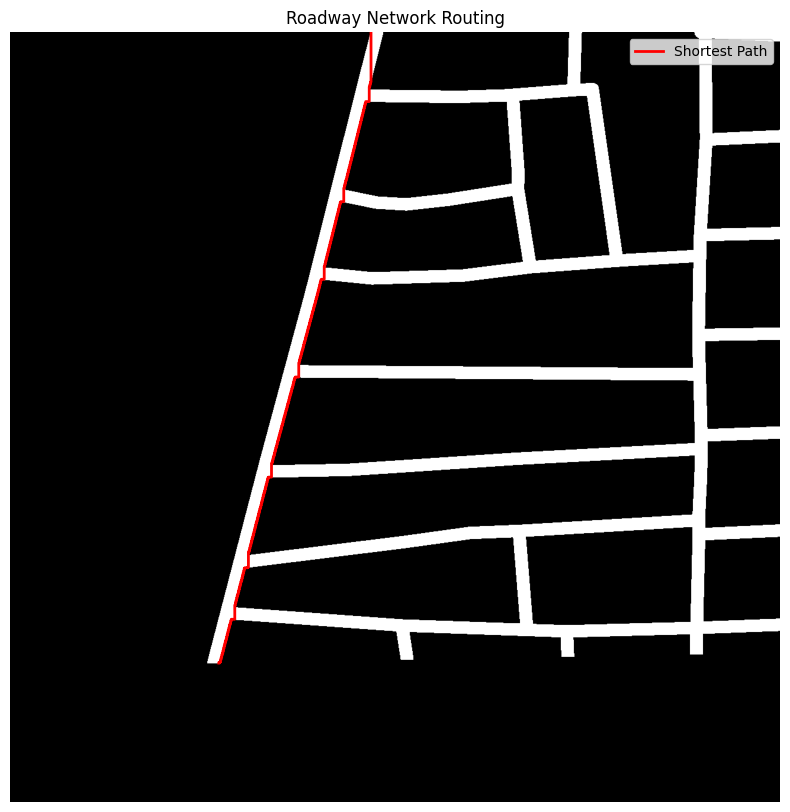

In [21]:
# Import necessary libraries
from PIL import Image
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

# Function to find start and end points
def find_start_end(grid):
    height, width = grid.shape
    # Find the top-leftmost white pixel
    for row in range(height):
        for col in range(width):
            if grid[row, col] == 255:
                start = (row, col)
                break
        else:
            continue
        break
    # Find the bottom-rightmost white pixel
    for row in range(height - 1, -1, -1):
        for col in range(width - 1, -1, -1):
            if grid[row, col] == 255:
                end = (row, col)
                break
        else:
            continue
        break
    return start, end

# Function to get valid neighboring pixels
def get_neighbors(row, col, height, width, grid):
    neighbors = []
    # Define four-directional moves: up, down, left, right
    for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        new_row, new_col = row + dr, col + dc
        # Check if the new position is within bounds and is a white pixel
        if (0 <= new_row < height and 
            0 <= new_col < width and 
            grid[new_row, new_col] == 255):
            neighbors.append((new_row, new_col))
    return neighbors

# BFS to find the shortest path
def bfs(grid, start, goal):
    height, width = grid.shape
    queue = deque([start])
    visited = set([start])
    came_from = {start: None}
    
    while queue:
        current = queue.popleft()
        if current == goal:
            return reconstruct_path(came_from, current)
        # Explore neighbors
        for neighbor in get_neighbors(*current, height, width, grid):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                came_from[neighbor] = current
    return None  # No path found

# Reconstruct the path from start to goal
def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        if current is not None:
            path.append(current)
    path.reverse()
    return path

# Load the image
dataset_img = 'test.png'
img = Image.open(dataset_img).convert('L')  # Convert to grayscale
grid = np.array(img)

# Find start and end points
start, end = find_start_end(grid)

# Find the shortest path
path = bfs(grid, start, end)

# Visualize the result
plt.figure(figsize=(10, 10))
plt.imshow(grid, cmap='gray')
if path:
    # Extract row and column coordinates from the path
    rows, cols = zip(*path)
    plt.plot(cols, rows, color='red', linewidth=2, label='Shortest Path')
    plt.legend()
else:
    print("No path found between the start and end points.")
plt.title('Roadway Network Routing')
plt.axis('off')  # Hide axes for clarity
plt.show()

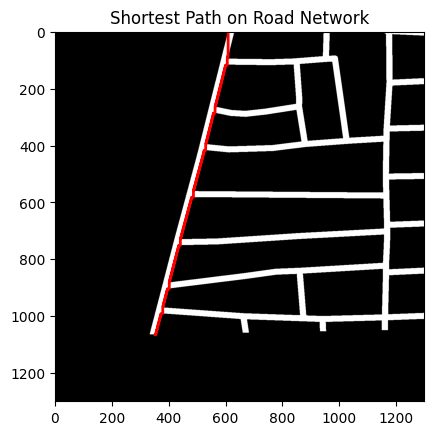

In [6]:
# Gem
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

dataset_img = 'test.png'
img = Image.open(dataset_img).convert('L') # Convert to grayscale
img_array = np.array(img)
binary_img = (img_array > 128).astype(np.uint8) # Create binary image

def get_start_end_points(binary_img):
    rows, cols = binary_img.shape
    start_point = None
    end_point = None

    # Find start point (first white from top-left)
    for r in range(rows):
        for c in range(cols):
            if binary_img[r, c] == 1:
                start_point = (r, c)
                break
        if start_point:
            break

    # Find end point (last white from bottom-right)
    for r in range(rows - 1, -1, -1):
        for c in range(cols - 1, -1, -1):
            if binary_img[r, c] == 1:
                end_point = (r, c)
                break
        if end_point:
            break
    return start_point, end_point

start_point, end_point = get_start_end_points(binary_img)

def bfs_shortest_path(binary_img, start, end):
    rows, cols = binary_img.shape
    queue = deque([(start, [start])])
    visited = {start}

    while queue:
        (current_node, path) = queue.popleft()

        if current_node == end:
            return path

        r, c = current_node
        neighbors = [(r-1, c), (r+1, c), (r, c-1), (r, c+1)] # Up, Down, Left, Right

        for nr, nc in neighbors:
            if 0 <= nr < rows and 0 <= nc < cols and binary_img[nr, nc] == 1 and (nr, nc) not in visited:
                visited.add((nr, nc))
                queue.append(((nr, nc), path + [(nr, nc)]))
    return None

path = bfs_shortest_path(binary_img, start_point, end_point)

def display_path(img_array, path):
    plt.imshow(img_array, cmap='gray')
    if path:
        path_array = np.array(path)
        plt.plot(path_array[:, 1], path_array[:, 0], 'r-', linewidth=2) # plot path
    plt.title('Shortest Path on Road Network')
    plt.show()

display_path(img_array, path)

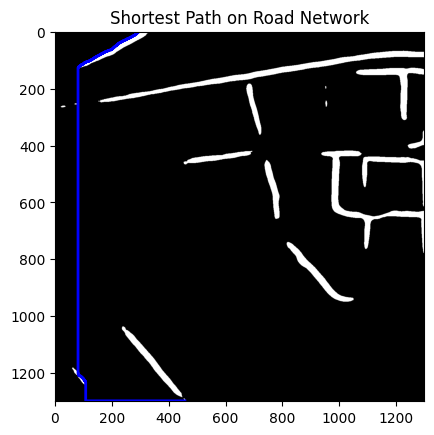

Shortest path found using only white pixels (red).


In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

dataset_img = 'test2_mask.png'
img = Image.open(dataset_img).convert('L')
img_array = np.array(img)
binary_img = (img_array > 128).astype(np.uint8)

def get_start_end_points(binary_img):
    rows, cols = binary_img.shape
    start_point = None
    end_point = None

    # Find start point (first white from top-left)
    for r in range(rows):
        for c in range(cols):
            if binary_img[r, c] == 1:
                start_point = (r, c)
                break
        if start_point:
            break

    # Find end point (last white from bottom-right)
    for r in range(rows - 1, -1, -1):
        for c in range(cols - 1, -1, -1):
            if binary_img[r, c] == 1:
                end_point = (r, c)
                break
        if end_point:
            break
    return start_point, end_point

start_point, end_point = get_start_end_points(binary_img)

def bfs_shortest_path_white_only(binary_img, start, end):
    rows, cols = binary_img.shape
    queue = deque([(start, [start])])
    visited = {start}

    while queue:
        (current_node, path) = queue.popleft()

        if current_node == end:
            return path, False  # Path found, not artificial

        r, c = current_node
        neighbors = [(r-1, c), (r+1, c), (r, c-1), (r, c+1)]

        for nr, nc in neighbors:
            if 0 <= nr < rows and 0 <= nc < cols and binary_img[nr, nc] == 1 and (nr, nc) not in visited:
                visited.add((nr, nc))
                queue.append(((nr, nc), path + [(nr, nc)]))
    return None, False # No white path found


def bfs_shortest_path_with_artificial(binary_img, start, end):
    rows, cols = binary_img.shape
    queue = deque([(start, [start], True)]) # (node, path, is_artificial)
    visited = {start}

    while queue:
        current_node, path, is_artificial = queue.popleft()

        if current_node == end:
            return path, is_artificial

        r, c = current_node
        neighbors = [(r-1, c), (r+1, c), (r, c-1), (r, c+1)]

        for nr, nc in neighbors:
            if 0 <= nr < rows and 0 <= nc < cols and (nr, nc) not in visited:
                if binary_img[nr, nc] == 1: # White pixel neighbor
                    visited.add((nr, nc))
                    queue.append(((nr, nc), path + [(nr, nc)], False)) # Not artificial anymore from here
                elif is_artificial: # Black pixel neighbor, only allowed if currently in artificial path mode
                    visited.add((nr, nc))
                    queue.append(((nr, nc), path + [(nr, nc)], True)) # Continue in artificial mode

    return None, False # No path found, even artificial


path, is_artificial = bfs_shortest_path_white_only(binary_img, start_point, end_point)

if path:
    path_color = 'r-' # Red for white path
else:
    path, is_artificial = bfs_shortest_path_with_artificial(binary_img, start_point, end_point)
    if path:
        path_color = 'b-' # Blue for artificial path
    else:
        path_color = None # No path at all


def display_path(img_array, path, path_color):
    plt.imshow(img_array, cmap='gray')
    if path:
        path_array = np.array(path)
        plt.plot(path_array[:, 1], path_array[:, 0], path_color, linewidth=2)
    else:
        plt.title('No Path Found')
    plt.title('Shortest Path on Road Network')
    plt.show()


display_path(img_array, path, path_color)

if not path:
    print("No path found between the start and end points, even with artificial path consideration.")
elif is_artificial:
    print("No direct white path found. Displaying artificial path (blue).")
else:
    print("Shortest path found using only white pixels (red).")